In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%config InlineBackend.figure_format = 'retina'

from kNN import kNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV

# k-nearest Neighbour without fine tuning

We will use digits dataset from sklearn for the same. There is reson to use digits dataset. The training data in digits dataset is clustered well and different classes are separated well.<br>
<br>
Due to this k-NN performs better than decision tree on this dataset.<br>
<br>
Below is the t-sne representation of the digits dataset.

In [3]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [4]:
digits = load_digits()

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(digits.data)

In [6]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_scaled)

In [7]:
%%time
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(pca_result_50)

CPU times: user 12.6 s, sys: 45.3 ms, total: 12.7 s
Wall time: 12.2 s


In [8]:
target_ids = range(len(digits.target_names))

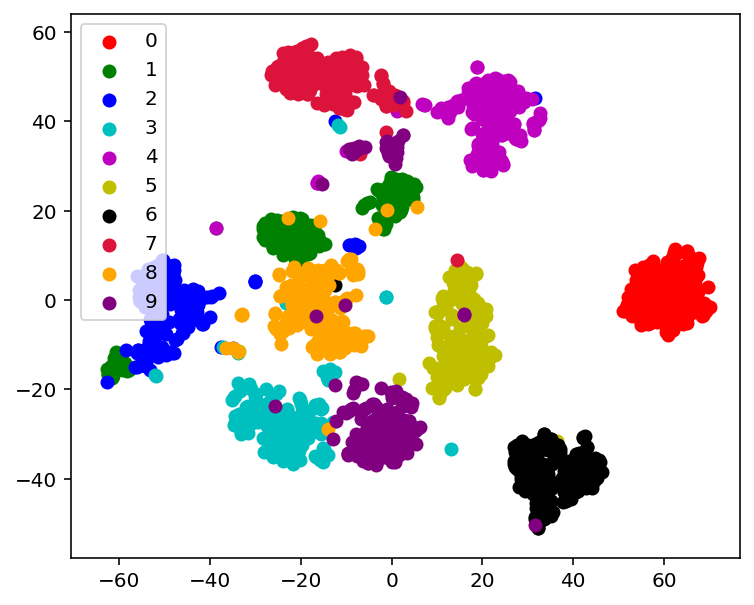

In [9]:
plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'crimson', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(tsne_repr[digits.target == i, 0], tsne_repr[digits.target == i, 1], c=c, label=label)
plt.legend()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, random_state=17, test_size=0.2)

In [11]:
knn = kNN(k=50)

In [12]:
knn.fit(X_train, y_train)

In [13]:
preds = knn.predict(X_test)

In [14]:
accuracy_score(y_test, preds)

0.9361111111111111

In [15]:
conf_mat = confusion_matrix(y_test, preds)

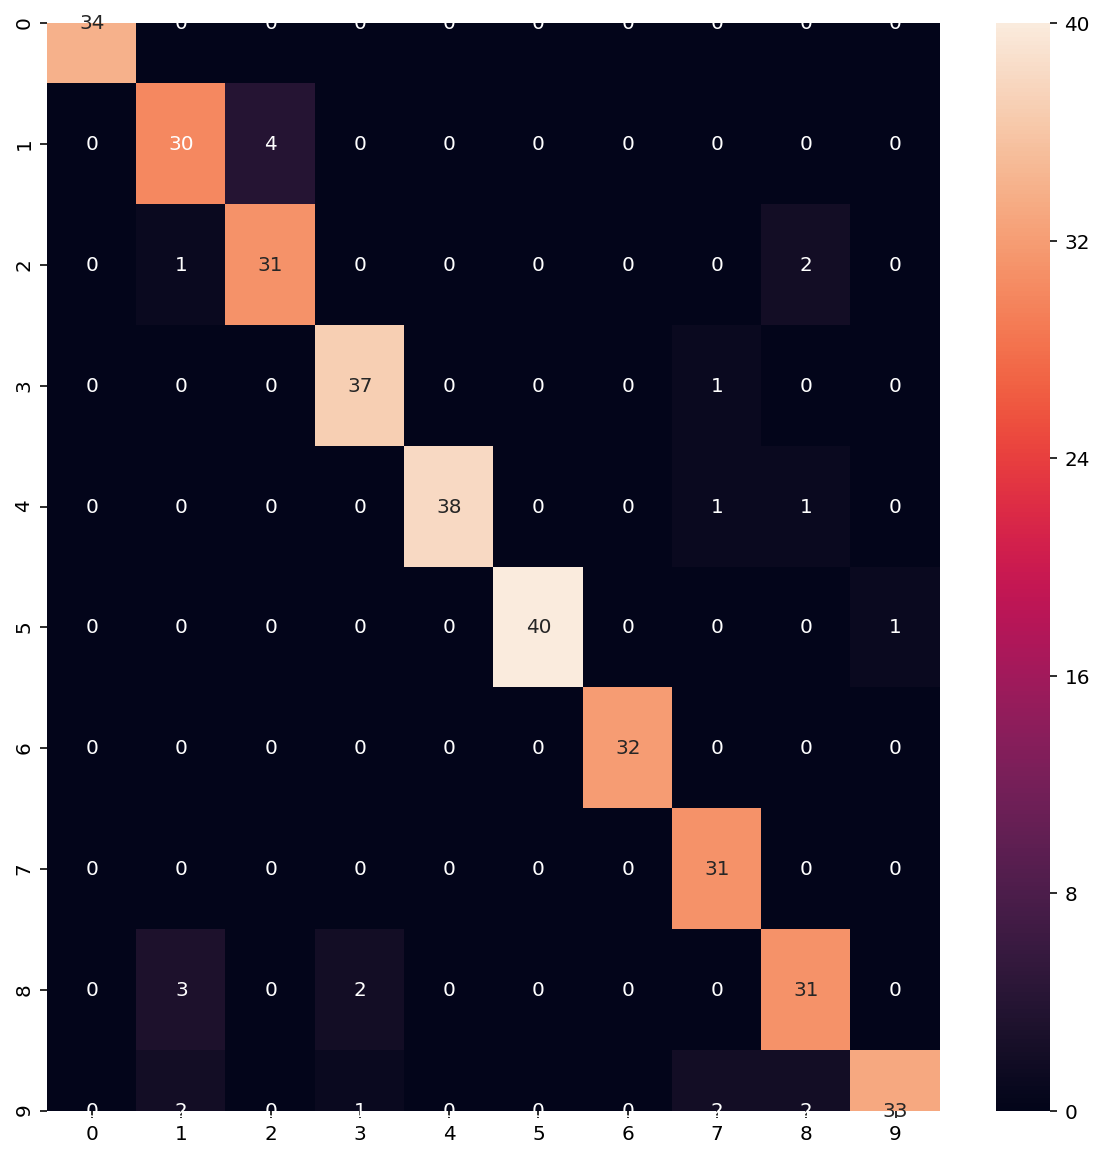

In [16]:
import seaborn as sns

df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)

Let's tune the kNN with gridsearch

In [17]:
knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', kNN())])
knn_params = {'knn__n_neighbors': range(10, 500, 25)}
knn_grid = GridSearchCV(knn_pipe, knn_params, cv=5, verbose=True, scoring='accuracy')
knn_grid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        <kNN.kNN object at 0x7f7422315950>)],
                                verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'knn__n_neighbors': range(10, 500, 25)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=True)

In [18]:
knn_grid.best_params_, knn_grid.best_score_

({'knn__n_neighbors': 10}, 0.9714683368128044)

In [19]:
preds_grid = knn_grid.predict(X_test)

In [20]:
accuracy_score(y_test, preds_grid)

0.9833333333333333

In [21]:
conf_mat = confusion_matrix(y_test, preds_grid)

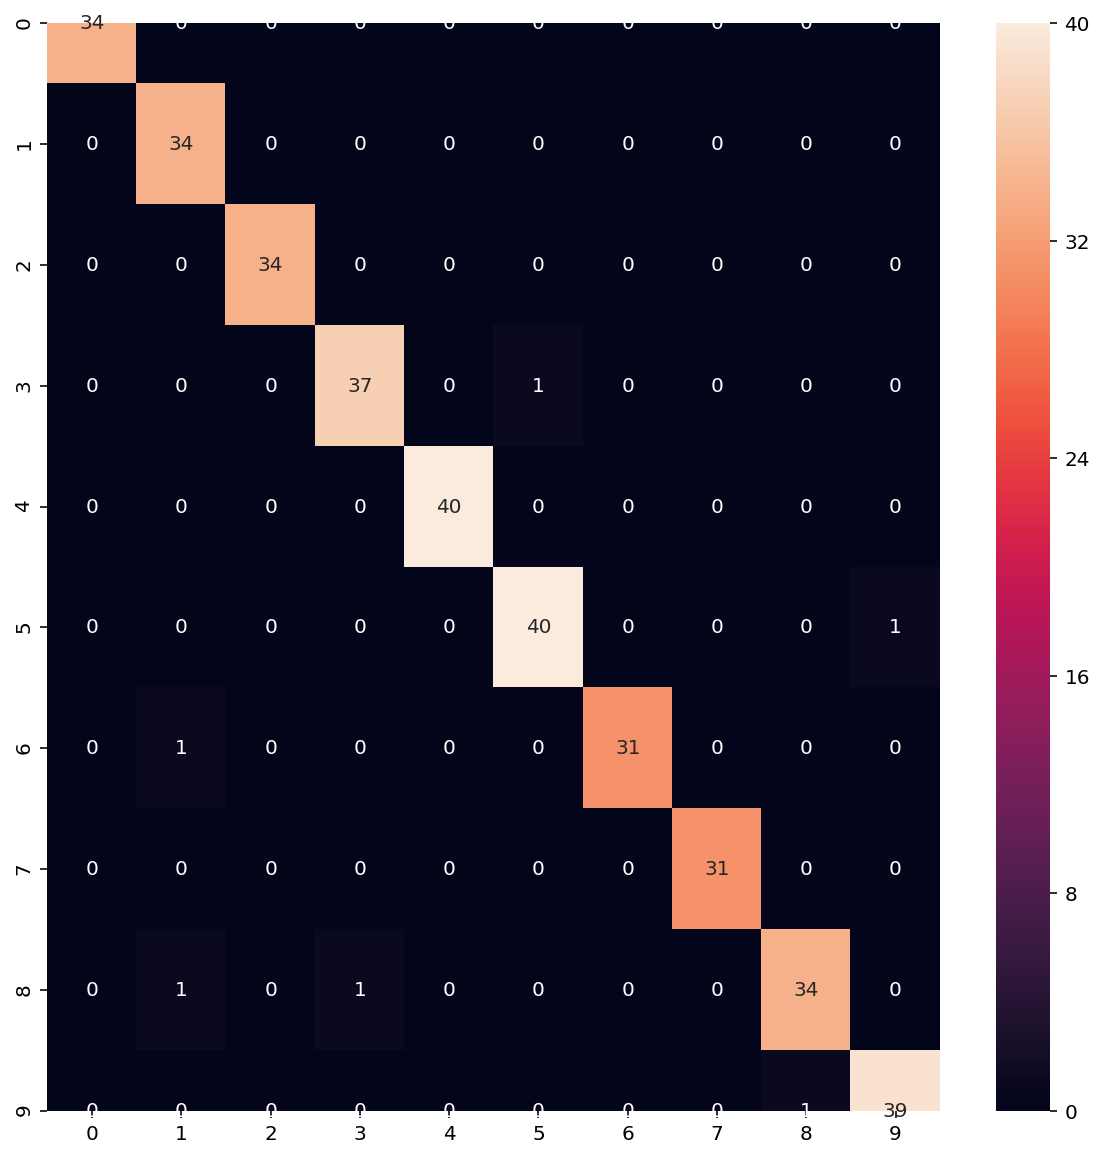

In [22]:
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,10))
sns.heatmap(df_cm, annot=True)